In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<hr style="border:2px solid black"> </hr>

# Time Series 

### If we make an assumption that the past repeats itself... we can predict the future

#### Use cases:
- **Economics**: GDP, stocks market predictions
- **Real world**: predicting grocery prices
- **Social**: predicting election results
- **Medicine**: prediction of infection, diseases
- **Physical Sciences**: climate/ temperature changes

**common theme**: we are looking at dates. Whether it be hundreds of years (climate change) or milliseconds (stock market)

<hr style="border:2px solid black"> </hr>

### We've worked in:
- **Python**:
    - primative- uses lists
    - datetime module (from datatime import datatime)
        - suboptimal
       
       <br>
        
- **Numpy**:
    - uses arrays
    - faster then Pthon
    - np.datatime64
    - has to be YYYY-MM-DD format
    - can do vectorized operations to it (add days)
    
    <br>
    
- **Pandas**: 
    - uses dataframes
    - Timestamp module
        - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
    - DataimeIndex module
        -         https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
    - more forgiving
    - strftime()
        - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

### Python:

In [2]:
# Python: datetime module

from datetime import datetime
d = datetime(year=2021, month=6, day=30)
d

datetime.datetime(2021, 6, 30, 0, 0)

In [3]:
# Once you have a datetime object 
#you can do things like printing the day of the week:
d.strftime('%A')

'Wednesday'

### Numpy:

In [4]:
import numpy as np
date = np.array('2015-07-14', dtype=np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [5]:
# Now can quickly do vectorized operations on it!

date + np.arange(1,5)

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18'],
      dtype='datetime64[D]')

### Pandas:

In [6]:
#timestamp object
t = pd.Timestamp('2021-06-30, 07:50:15')
t

#timestamp can do down to manoseconds if needed

Timestamp('2021-06-30 07:50:15')

In [7]:
# We can use various attributes of datetime object 
#to figure out day, month, year, weekday etc
t.quarter

#this will show you it is in the 2 quarter

2

In [8]:
# weekday?
t.weekday()

#this will show you its the second weekday

2

In [9]:
#name of the week
t.day_name()

'Wednesday'

<hr style="border:2px solid black"> </hr>

## Example:

In [10]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [11]:
#panda does not realize that date is a date... it sees it as an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [12]:
# check for nulls
df.isnull().sum()

#no nulls

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

<hr style="border:1px solid black"> </hr>

## Plotting data in Time Series

- cannot interpret the date as a number so it's not able to be plotted
- this MUST be changed
- X-axis should always be date

<AxesSubplot:>

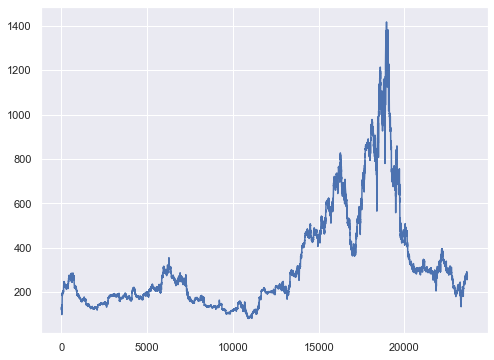

In [13]:
#plot the closing price
df.Close.plot()

#this chart is INVALID
#the order of the entries MATTER in time series

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:

#### Steps:
1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as Index
3. Sort the datetime index

In [14]:
# pandas to_datetime method can convert strings/object to datetime object (aka Timestamp object).
# Most of time pandas is smart enough to parse the date without any help.

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [15]:
# Sometimes we have to specify the format of the datatime string to help pandas parse the date/time)
# must specify the format if using unconventional format
pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

#### Step 1: Lets convert the 'Date' column in our df to pandas datetime object using pd.to_datetime()


In [16]:
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p')

In [17]:
# confirm if the 'Date' column is indeed a datetime object now

df.Date

#now pandas realizes that the dtype is datetime64 so we CAN graph

0       2020-03-13 12:00:00
1       2020-03-13 00:00:00
2       2020-03-13 11:00:00
3       2020-03-13 10:00:00
4       2020-03-13 09:00:00
                ...        
23669   2017-07-01 17:00:00
23670   2017-07-01 16:00:00
23671   2017-07-01 15:00:00
23672   2017-07-01 14:00:00
23673   2017-07-01 13:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

#### Step 2: Set 'Date' column as Index

In [18]:
df = df.set_index('Date')

#### Step 3: sort the index

In [19]:
df=df.sort_index()

In [20]:
## Can do steps 2 &3 together by...
#df = df.set_index('Date').sort_index()

In [21]:
df.head(5)

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [22]:
# What is the Index type now?

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

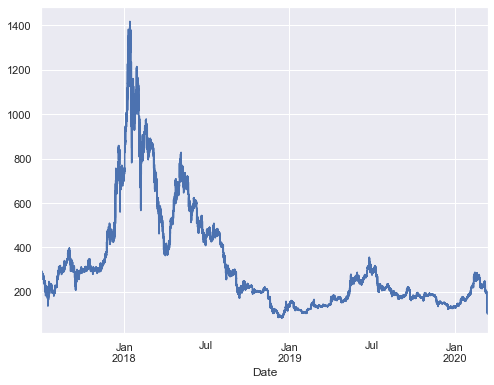

In [23]:
# lets plot the closing price again and how it compares to previous plot
df.Close.plot()

#NOW this is a valid chart
#axis is correct and chart is accurate

<hr style="border:1px solid black"> </hr>

In [24]:
# add a new columns called 'day' which is the 'weekday'

df['day'] = df.index.day_name()

In [25]:
#take a look at the day
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [26]:
#will show you the average volume by day
df.groupby('day').mean().Volume

day
Friday      2135717.51
Monday      1913387.22
Saturday    1455576.12
Sunday      1453491.59
Thursday    2250669.08
Tuesday     2355954.53
Wednesday   2510755.96
Name: Volume, dtype: float64

<AxesSubplot:xlabel='day'>

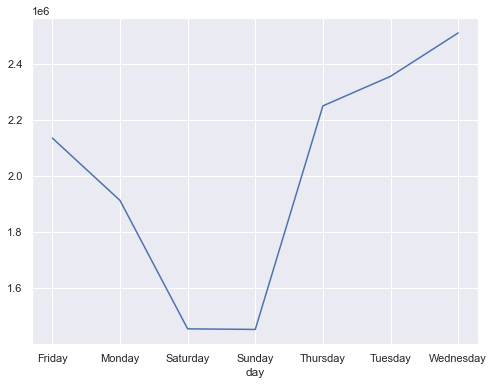

In [27]:
#plot the above data
#shows that lowest volume is on weekends and peak is on wednesday
df.groupby('day').mean().Volume.plot()

<hr style="border:2px solid black"> </hr>

## How to choose a subset of a dataframe

In [28]:
df.loc['2017-07-01 11:00:00']

Symbol      ETHUSD
Close       257.13
Volume   679358.87
day       Saturday
Name: 2017-07-01 11:00:00, dtype: object

In [29]:
#show all data for 2017
df['2017']

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2017-12-31 19:00:00,ETHUSD,719.50,2363924.30,Sunday
2017-12-31 20:00:00,ETHUSD,727.47,3330359.12,Sunday
2017-12-31 21:00:00,ETHUSD,743.50,2908764.02,Sunday


In [30]:
# choose rows for '2017-07-01' (show only first 10 values)
df['2017-07-01'][:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday


In [31]:
# we can also use date range
df['2018-02-01':'2018-02-02'].head(10)

,Symbol,Close,Volume,day
Date,,,,
2018-02-01 00:00:00,ETHUSD,998.00,10842844.20,Thursday
2018-02-01 01:00:00,ETHUSD,1110.45,6160097.38,Thursday
2018-02-01 02:00:00,ETHUSD,1138.68,9858134.59,Thursday
2018-02-01 03:00:00,ETHUSD,1130.00,14240568.70,Thursday
2018-02-01 04:00:00,ETHUSD,1130.00,6016977.66,Thursday
2018-02-01 05:00:00,ETHUSD,1100.99,0.00,Thursday
2018-02-01 06:00:00,ETHUSD,1075.00,0.00,Thursday
2018-02-01 07:00:00,ETHUSD,1113.99,0.00,Thursday
2018-02-01 08:00:00,ETHUSD,1103.47,9650043.46,Thursday


<hr style="border:1px solid black"> </hr>

### Vocab:
- **Upsampling**: increasing the frequency.
    - instead of every hour, you go to every minute
    - .asfreq()
       - .ffill()
       - .bfill()
- **Downsampling**: decreasing the frequency
    - instead of every hour, you go to every day
    
<br>

#### What did we do our dataframe (size?)¶
**Code Description**
- D Calendar day
- W Weekly
- M Month end
- Q Quarter end
- A Year end
- H Hours
- T Minutes
- S Seconds
- L Milliseonds
- U Microseconds
- N nanoseconds

<hr style="border:2px solid black"> </hr>

## Upsampling:
- will increase the size of your dataframe
- will have nulls is use method=None
- can use .ffill(), .bfill(), or .fillna()

In [32]:
df.asfreq('T', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:01:00,NaN,nan,nan,NaN
2017-07-01 11:02:00,NaN,nan,nan,NaN
2017-07-01 11:03:00,NaN,nan,nan,NaN
2017-07-01 11:04:00,NaN,nan,nan,NaN
...,...,...,...,...
2020-03-13 19:56:00,NaN,nan,nan,NaN
2020-03-13 19:57:00,NaN,nan,nan,NaN
2020-03-13 19:58:00,NaN,nan,nan,NaN


### Forward Fill
- .ffill()
- use ffill/padding to handle nans
- uses last known value and puts it forward in time
    - 12:30:00 uses time from 12:00:00 on original df to fill
- will not fill nulls from original df

In [33]:
df.asfreq('45Min', method = 'ffill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:15:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday


### Back Fill
- .bfill()
- use bfill to handle nans
- uses next know value and puts it back in time
    - 12:30:00 uses time from 1:00:00 on original df to fill
- will not fill nulls from original df
- **less common** than .ffill()

In [34]:
df.asfreq('45Min', method = 'bfill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 12:30:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 13:15:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,128.93,4898735.81,Friday
2020-03-13 18:30:00,ETHUSD,134.03,7579741.09,Friday


### Fill NA
- .fillna()
- use fillna to handle nans using desired value
- will not fill nulls from original df

In [35]:
df.asfreq('45min').fillna(0)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,0,0.00,0.00,0
2017-07-01 12:30:00,0,0.00,0.00,0
2017-07-01 13:15:00,0,0.00,0.00,0
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,0,0.00,0.00,0
2020-03-13 18:30:00,0,0.00,0.00,0


<hr style="border:1px solid black"> </hr>

## Downsampling:
- We can use .asfreq method. 

In [36]:
#Here we go from data every hour to every 3 hours
# show only first 10 values:
df.asfreq('3H')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 20:00:00,ETHUSD,259.50,2366698.50,Saturday
2017-07-01 23:00:00,ETHUSD,263.84,1902503.11,Saturday
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday
2017-07-02 08:00:00,ETHUSD,263.53,2863655.38,Sunday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday


In [37]:
# selecting data based on daily frequency:
df.asfreq('D')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday
2017-07-03 11:00:00,ETHUSD,279.50,1218731.52,Monday
2017-07-04 11:00:00,ETHUSD,269.57,391696.83,Tuesday
2017-07-05 11:00:00,ETHUSD,265.20,1110376.59,Wednesday
2017-07-06 11:00:00,ETHUSD,264.27,731636.01,Thursday
2017-07-07 11:00:00,ETHUSD,246.15,1103959.23,Friday
2017-07-08 11:00:00,ETHUSD,242.61,558833.41,Saturday
2017-07-09 11:00:00,ETHUSD,243.01,249725.78,Sunday


<hr style="border:1px solid black"> </hr>

## Resampling:
- Fundamentally data aggregation (similar to groupby but for dates)
    - as opposed to afreq which is more of a 'data selection'
- Only works on dataframes with a datetime index
- .mean(), .max(), .min(), .quantile(), .apply(), OR custom functions

In [38]:
# resample the whole dataframe every hour using mean as an aggregator
df.resample('D').mean().head()

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44


In [39]:
# resample monthly and use mean for aggregation
df.resample('M').mean().head()
#takes you to LAST day of the month

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


In [40]:
# resample monthly and use mean for aggregation
df.resample('MS').mean().head()
#takes you to FIRST day of the month

,Close,Volume
Date,,
2017-07-01,220.01,2480603.27
2017-08-01,298.51,2056355.72
2017-09-01,298.52,2331871.43
2017-10-01,305.65,1096152.84
2017-11-01,355.65,2741743.75


In [41]:
# resample yearly and use mean for aggregation
df.resample('Y').mean().head()
#takes you to LAST day of the year

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


In [42]:
df.resample('YS').mean().head()
#takes you to FIRST day of the year

,Close,Volume
Date,,
2017-01-01,351.97,2948844.73
2018-01-01,480.93,2733347.11
2019-01-01,180.75,936000.88
2020-01-01,197.57,1415723.35


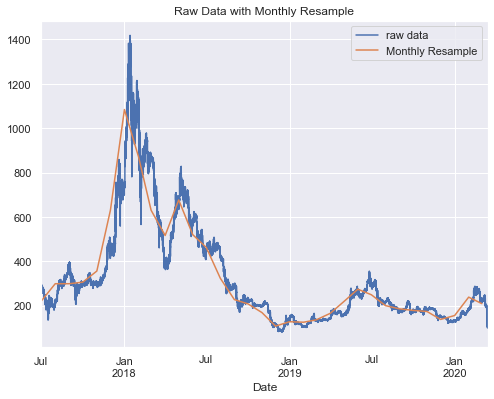

In [43]:
#plot raw data with monthly resample
df.Close.plot(label='raw data')
df.resample('M').mean().Close.plot(label='Monthly Resample')
plt.legend()
plt.title('Raw Data with Monthly Resample')
plt.show()

<hr style="border:2px solid black"> </hr>

## Rolling Averages/Windows:
- AKA moving averages
- generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

-(ex): 7 day rolling average of Covid rates

In [44]:
#take a look at the data
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [45]:
# What is the rolling average of 4 hours?
#look at the last 4 periods
#first 3 values are nan because it does not have 'last 4'
df.rolling(4).mean()

,Close,Volume
Date,,
2017-07-01 11:00:00,nan,nan
2017-07-01 12:00:00,nan,nan
2017-07-01 13:00:00,nan,nan
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.56
...,...,...
2020-03-13 16:00:00,118.56,6289262.63
2020-03-13 17:00:00,127.29,4581942.13
2020-03-13 18:00:00,126.79,4873146.86


In [46]:
#resample weekly average and then rolling mean for last 4 weeks
#every week is the average for last 4 weeks
df.resample('W').mean().Close.rolling(4).mean()

Date
2017-07-02      nan
2017-07-09      nan
2017-07-16      nan
2017-07-23   234.44
2017-07-30   218.21
              ...  
2020-02-16   201.10
2020-02-23   226.48
2020-03-01   241.13
2020-03-08   246.68
2020-03-15   226.96
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

In [47]:
#weekly resample , rolling average for last 26 weeks
df.resample('W').mean().Close.rolling(26).mean()

Date
2017-07-02      nan
2017-07-09      nan
2017-07-16      nan
2017-07-23      nan
2017-07-30      nan
              ...  
2020-02-16   172.29
2020-02-23   175.10
2020-03-01   177.40
2020-03-08   179.47
2020-03-15   179.28
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

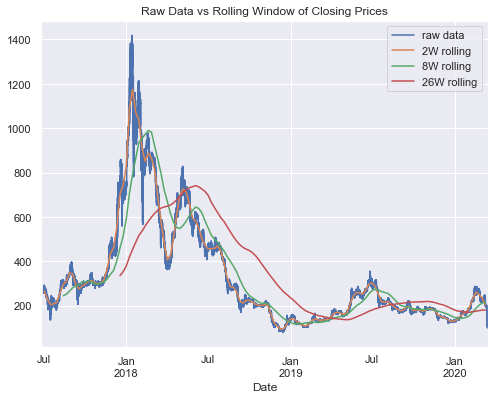

In [48]:
# %matplotlib notebook
df.Close.plot(label = 'raw data')

#every 2 weeks- orange
df.resample('W').mean().Close.rolling(2).mean().plot(label = '2W rolling')

#every 8 weeks- green
df.resample('W').mean().Close.rolling(8).mean().plot(label = '8W rolling')

#every 26 weeks- red
#cannot get average until 26 days out (starts at different place)
#peak is shifted (there is a lag)
df.resample('W').mean().Close.rolling(26).mean().plot(label = '26W rolling')

plt.title('Raw Data vs Rolling Window of Closing Prices')
plt.legend()

#### Min/max or any other aggregation
- (ex): look at max if tying to do traffic congestion data. 
    - bottle necks, peak hours
- (ex): min/max for tracking diabetes- glucose levels


<hr style="border:2px solid black"> </hr>

## Lagging and Lead:
- **Shift**: move the data backwards and forwards by a given amount
- **diff**: find the difference with the previous observation (or a specified further back observation)
- Can be used to computing differences over time


In [49]:
#change hourly data to daily data
df_daily = df.resample('D').mean()
df_daily.head(10)

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
2017-07-06,266.48,962700.63
2017-07-07,253.94,1801485.06
2017-07-08,241.55,1356294.00
2017-07-09,244.81,729444.92


In [50]:
#Use 'shift' to move the timeseries into the future
#create new column called shift1
#1 is the default
df_daily['shift(1)'] = df_daily.Close.shift(1)
df_daily.head(10)

#moves data over by 1
#so data for 7-1 gets bumped to 7-2 (since specified shift 1)

,Close,Volume,shift(1)
Date,,,
2017-07-01,265.28,2198771.14,nan
2017-07-02,269.78,2177595.32,265.28
2017-07-03,278.88,1459014.73,269.78
2017-07-04,276.74,1254579.39,278.88
2017-07-05,265.03,1797923.44,276.74
2017-07-06,266.48,962700.63,265.03
2017-07-07,253.94,1801485.06,266.48
2017-07-08,241.55,1356294.00,253.94
2017-07-09,244.81,729444.92,241.55


In [51]:
# create a new column 'diff(1)'
df_daily['diff(1)'] = df_daily.Close.diff(1)
df_daily.head(10)

#shows different between days (specified diff 1)
#difference between 7-1 and 7-2 is 4.50

,Close,Volume,shift(1),diff(1)
Date,,,,
2017-07-01,265.28,2198771.14,nan,nan
2017-07-02,269.78,2177595.32,265.28,4.50
2017-07-03,278.88,1459014.73,269.78,9.10
2017-07-04,276.74,1254579.39,278.88,-2.14
2017-07-05,265.03,1797923.44,276.74,-11.72
2017-07-06,266.48,962700.63,265.03,1.45
2017-07-07,253.94,1801485.06,266.48,-12.54
2017-07-08,241.55,1356294.00,253.94,-12.39
2017-07-09,244.81,729444.92,241.55,3.27


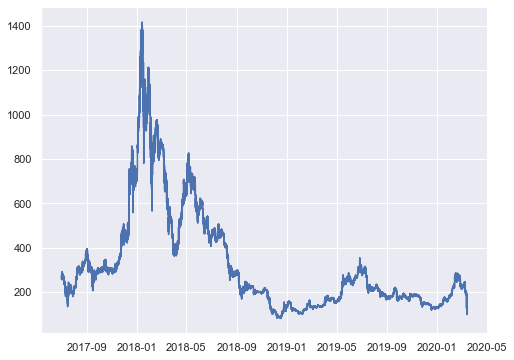

In [52]:
plt.plot(df.Close)

(17348.0, 18048.0)

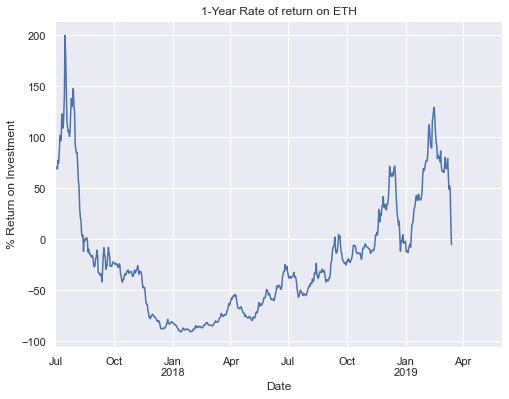

In [53]:
# %matplotlib inline
# Use for shift/diff to calculate 1 year rate of return

((df_daily.Close.shift(-365)/df_daily.Close -1) *100).plot()
plt.ylabel('% Return on Investment')
plt.title('1-Year Rate of return on ETH')
plt.xlim(pd.Timestamp('2017-07'), pd.Timestamp('2019-06'))

<hr style="border:2px solid black"> </hr>

## Time Zone:
- can specify timezone in object you create
- not neccessary most of the time
    - easy to mess up if changing/specifying timezones
    - 8pm is 8pm everywhere
- over 400 timezones to choose from

In [54]:
t = pd.Timestamp('2020-04-14 10:20:20')
t

Timestamp('2020-04-14 10:20:20')

In [55]:
#specify timezone
t1 = pd.Timestamp('2020-04-14, 07:50', tz = 'US/Central')
t1

Timestamp('2020-04-14 07:50:00-0500', tz='US/Central')

In [56]:
# convert to a different timezone
t1.tz_convert(tz = 'Asia/tokyo')

#the time has changed now, plus 9hrs from us/central
#does not just put different label on it

Timestamp('2020-04-14 21:50:00+0900', tz='Asia/Tokyo')

In [57]:
# What is date and time right now? 
#Take any datetime object and use .now() method

pd.Timestamp.now()

Timestamp('2021-06-30 11:47:44.497315')

<hr style="border:2px solid black"> </hr>

## Timedelta:
- take time and subtract it

In [58]:
#time delta between now (today's date) and t
(pd.Timestamp.now() - t)

Timedelta('442 days 01:27:24.502164')

In [59]:
t, t1

(Timestamp('2020-04-14 10:20:20'),
 Timestamp('2020-04-14 07:50:00-0500', tz='US/Central'))

In [60]:
#Can we find time delta between t and t1?
t-t1


TypeError: Timestamp subtraction must have the same timezones or no timezones

In [ ]:
#got error because we cannot subtract a time with a timezone and one without

In [61]:
# To convert the above Timedelta object to a number:
(pd.Timestamp.now() - t) // pd.Timedelta('1d')

#turn into integer... just to get a number you can work with

442

<hr style="border:2px solid black"> </hr>

## Bonus

In [62]:
#How to remove timezone info from a datetime object
t1 = t1.tz_localize(None)
t1

Timestamp('2020-04-14 07:50:00')

In [63]:
#What is going on here?
pd.Timestamp('2021-03-14 02:00', tz = 'US/Eastern')

NonExistentTimeError: 2021-03-14 02:00:00

In [64]:
#got an error because there is not 02:00 on that day (daylight savings)